In [1]:
from pipeline import CustomPipeline
import pandas as pd

In [2]:
df = pd.read_csv("../physionet.org/files/widsdatathon2020/1.0.0/data/cleaned_imputed.csv")
df_ = pd.read_csv('../physionet.org/files/widsdatathon2020/1.0.0/data/WiDS_Datathon_2020_Dictionary.csv')

BINARY_ATTS = df_[df_['Data Type'].str.lower() == 'binary']['Variable Name'].tolist()
print(f"Binary atts : {BINARY_ATTS}")
STRING_ATTS = df_[df_['Data Type'].str.lower() == 'string']['Variable Name'].tolist()
print(f"String atts : {STRING_ATTS}")
INT_ATTS = df_[df_['Data Type'].str.lower() == 'integer']['Variable Name'].tolist()
print(f"Integer atts : {INT_ATTS}")
FLOAT_ATTS = df_[df_['Data Type'].str.lower() == 'numeric']['Variable Name'].tolist()
FLOAT_ATTS.remove('pred')
print(f"Float atts : {FLOAT_ATTS}")

Binary atts : ['hospital_death', 'elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
String atts : ['bmi', 'ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_admit_type', 'icu_stay_type', 'icu_type', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_3j_bodysystem', 'apache_2_bodysystem']
Integer atts : ['encounter_id', 'hospital_id', 'patient_id', 'icu_id', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']
Float atts : ['age', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', '

In [3]:
# Filter out only those columns that exist in the DataFrame
int_cols = [col for col in BINARY_ATTS+INT_ATTS if col in df.columns]
str_cols = [col for col in STRING_ATTS if col in df.columns]
float_cols = [col for col in FLOAT_ATTS if col in df.columns]
del df["Unnamed: 0"]

print(df.info())
# Convert the existing columns to numeric, coercing errors to NaN
df[int_cols] = df[int_cols].apply(lambda col: pd.to_numeric(col, errors='raise', downcast="integer"))
df[float_cols] = df[float_cols].apply(lambda col: pd.to_numeric(col, errors='raise', downcast="float"))
print(df.info())

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87127 entries, 0 to 87126
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               87127 non-null  float64
 1   age                          87127 non-null  float64
 2   bmi                          87127 non-null  float64
 3   elective_surgery             87127 non-null  float64
 4   ethnicity                    87127 non-null  object 
 5   gender                       87127 non-null  object 
 6   height                       87127 non-null  float64
 7   hospital_admit_source        87127 non-null  object 
 8   icu_admit_source             87127 non-null  object 
 9   icu_type                     87127 non-null  object 
 10  pre_icu_los_days             87127 non-null  float64
 11  apache_2_diagnosis           87127 non-null  float64
 12  arf_apache                   87127 non-null  float64
 13  bun_apache      

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_type,...,d1_potassium_max,aids,cirrhosis,diabetes_mellitus,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,0.336237,22.730000,0,Caucasian,M,0.996894,Floor,Floor,CTICU,...,-0.371684,0,0,1,0,0,0,0,Sepsis,Cardiovascular
1,0,0.885049,27.420000,0,Caucasian,F,-0.899890,Floor,Floor,Med-Surg ICU,...,-0.035787,0,0,1,0,0,0,0,Respiratory,Respiratory
2,0,-2.285864,31.950000,0,Caucasian,F,0.286768,Emergency Department,Accident & Emergency,Med-Surg ICU,...,-0.035787,0,0,0,0,0,0,0,Metabolic,Metabolic
3,0,1.128965,22.640000,1,Caucasian,F,-0.423358,Operating Room,Operating Room / Recovery,CTICU,...,1.307803,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular
4,0,-2.651739,27.654655,0,Caucasian,M,1.716364,Emergency Department,Accident & Emergency,Med-Surg ICU,...,-0.035787,0,0,0,0,0,0,0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87122,0,0.763091,23.060250,0,Caucasian,M,0.763300,Acute Care/Floor,Floor,Cardiac ICU,...,-0.035787,0,0,1,0,0,0,1,Sepsis,Cardiovascular
87123,0,-0.395512,47.179671,0,Caucasian,F,1.249176,Emergency Department,Floor,Med-Surg ICU,...,-0.707582,0,0,0,0,0,0,0,Sepsis,Cardiovascular
87124,0,-0.883345,27.236914,0,Caucasian,M,0.053174,Emergency Department,Accident & Emergency,Med-Surg ICU,...,0.803957,0,0,1,0,0,0,0,Metabolic,Metabolic
87125,0,0.153300,23.297481,0,Caucasian,F,-1.376422,Emergency Department,Accident & Emergency,Med-Surg ICU,...,-0.035787,0,0,0,0,0,0,0,Respiratory,Respiratory


In [4]:
pipe = CustomPipeline("logreg")

In [5]:
pipe.preprocessing(df, "hospital_death")


              X train: (69701, 53)

              X test: (17426, 53)

              y train: (69701,)

              y test: (17426,)

              


/Users/alexraudvee/Desktop/TU_e/year_3/Y3_Q3_Responsible_Data_Science/Fairness-First-ICU-ML/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
pipe.train()

Training is Done


In [7]:
pipe.predict()


                Accuracy: 0.7119247102031447

                Confusion Matrix: 
[[11650  4604]
 [  416   756]]

                Report: 
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     16254
           1       0.14      0.65      0.23      1172

    accuracy                           0.71     17426
   macro avg       0.55      0.68      0.53     17426
weighted avg       0.91      0.71      0.78     17426


                
ROC AUC: 0.746
F1 Score: 0.231
Average Precision (PR AUC): 0.185
Brier Score: 0.199 (lower = better calibrated)
Demographic Parity difference = -0.030
Privileged group selection rate = 0.294
Unprivileged group selection rate = 0.324
Equalized Odds TPR difference = -0.039
TPR (priv) = 0.627, TPR (unpriv) = 0.665
Equalized Odds FPR difference = -0.028
FPR (priv) = 0.271, FPR (unpriv) = 0.298


/Users/alexraudvee/Desktop/TU_e/year_3/Y3_Q3_Responsible_Data_Science/Fairness-First-ICU-ML/training/pipeline.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


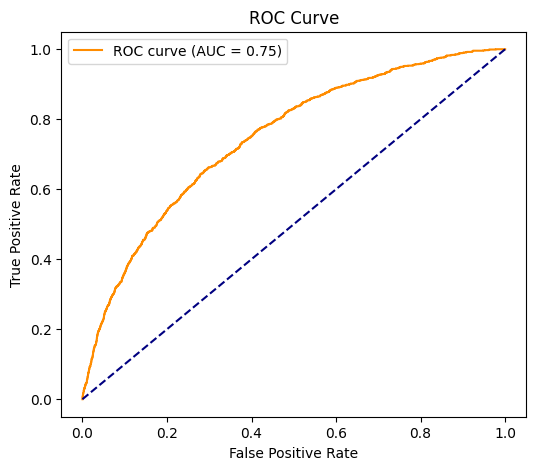

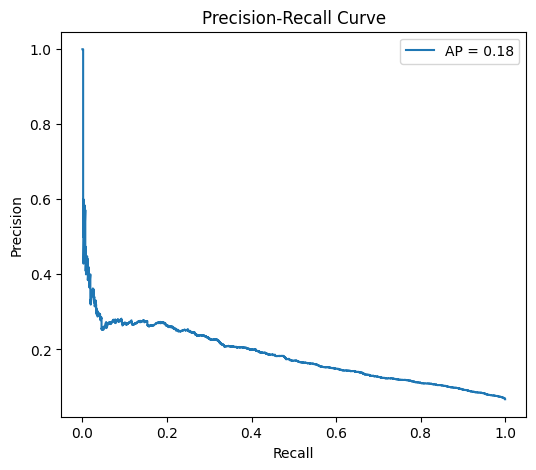

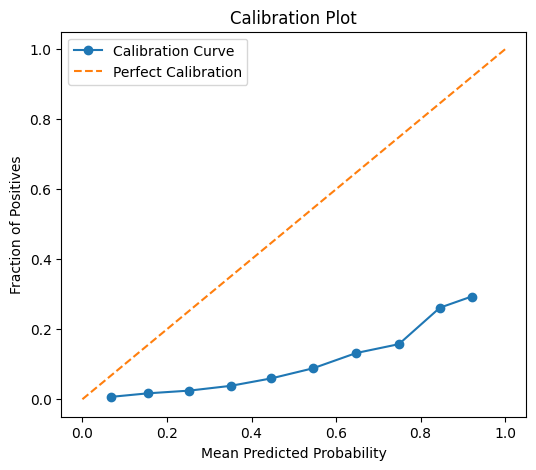

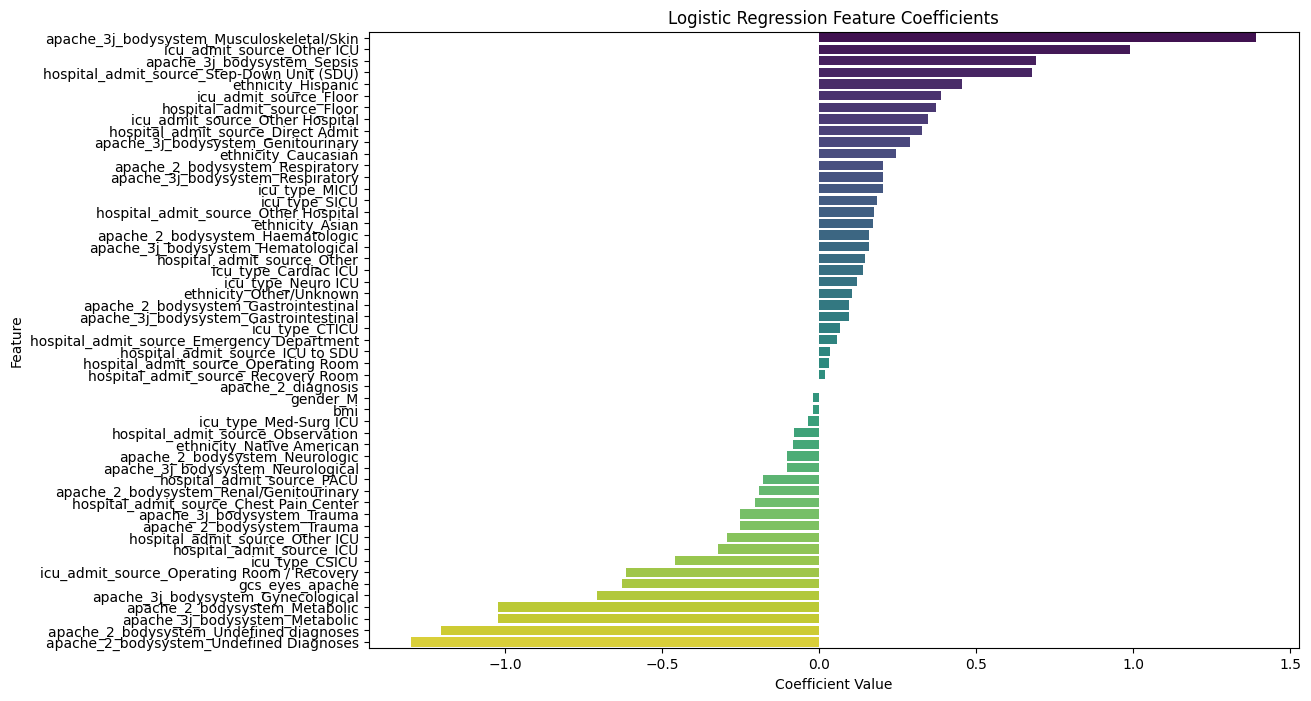

In [8]:
pipe.eval()